# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

!pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
final_city = []

for city in cities:
    query = query_url + city
    response = requests.get(query)
    response_json = response.json()
    try:
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        final_city.append(city)
        print(f"{city} found!")

    except:
        print("City not found, skipping...")
        pass
time.sleep(60)

east london found!
avarua found!
severo-kurilsk found!
kapaa found!
City not found, skipping...
City not found, skipping...
City not found, skipping...
matamoros found!
bowen found!
mataura found!
rikitea found!
ushuaia found!
jamestown found!
ponta do sol found!
staryy nadym found!
cape town found!
chuy found!
City not found, skipping...
butaritari found!
ukiah found!
bredasdorp found!
wattegama found!
boa vista found!
provideniya found!
kaeo found!
City not found, skipping...
City not found, skipping...
port alfred found!
atuona found!
kalmunai found!
ucluelet found!
xining found!
arraial do cabo found!
honiara found!
hualmay found!
sakakah found!
south venice found!
khatanga found!
vaini found!
qaanaaq found!
northam found!
lorengau found!
te anau found!
tomatlan found!
kaitangata found!
pevek found!
City not found, skipping...
new norfolk found!
kulhudhuffushi found!
thompson found!
luganville found!
cidreira found!
pangnirtung found!
saint-francois found!
bryan found!
kayerkan fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
final_city = pd.DataFrame({
    'City': final_city,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

final_city.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,29.52,54,0,4.63,ZA,1640596015
1,avarua,-21.2078,-159.7750,23.03,83,46,1.54,CK,1640596016
2,severo-kurilsk,50.6789,156.1250,-2.08,87,84,5.81,RU,1640596016
3,kapaa,22.0752,-159.3190,23.18,73,20,0.45,US,1640596017
4,matamoros,25.5333,-103.2500,16.17,34,9,1.97,MX,1640595996


In [5]:
final_city.to_csv('./output/final_city.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# 0
final_city.loc[(final_city["Humidity"] > 100)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

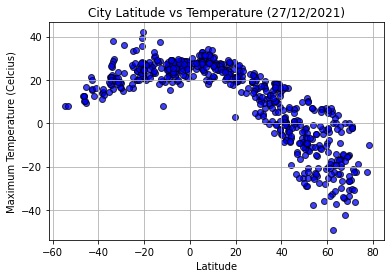

In [7]:
x = final_city["Lat"]
y = final_city["Max Temp"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.title("City Latitude vs Temperature (27/12/2021)")

plt.savefig("./Images/LatitudeTemperature.png")
plt.show()

## Latitude vs. Humidity Plot

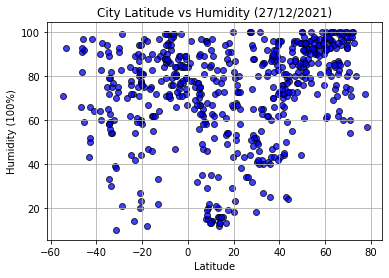

In [8]:
x = final_city["Lat"]
y = final_city["Humidity"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (100%)")
plt.title("City Latitude vs Humidity (27/12/2021)")

plt.savefig("./Images/LatitudeHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

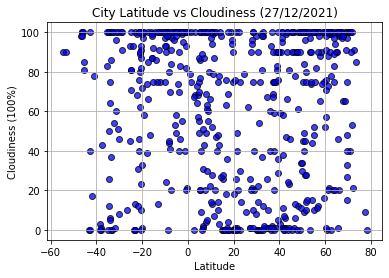

In [9]:
x = final_city["Lat"]
y = final_city["Cloudiness"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (100%)")
plt.title("City Latitude vs Cloudiness (27/12/2021)")

plt.savefig("./Images/LatitudeCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

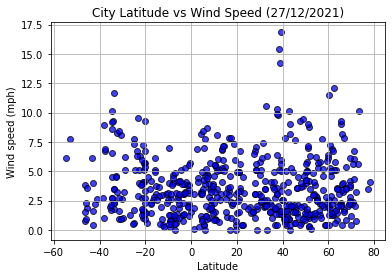

In [10]:
x = final_city["Lat"]
y = final_city["Wind Speed"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (27/12/2021)")

plt.savefig("./Images/LatitudeWindSpeed.png")
plt.show()

## Linear Regression

In [11]:
northern = final_city[final_city['Lat'] > 0]
southern = final_city[final_city['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

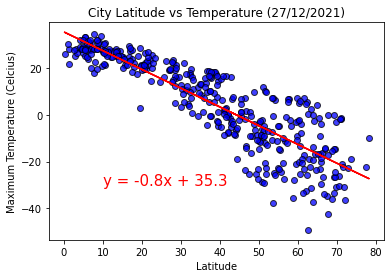

R squared: 0.7650962445831951


In [12]:
x = northern["Lat"]
y = northern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.title("City Latitude vs Temperature (27/12/2021)")

plt.savefig("./Images/North_LatitudeMaxTemp.png")
plt.show()

print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

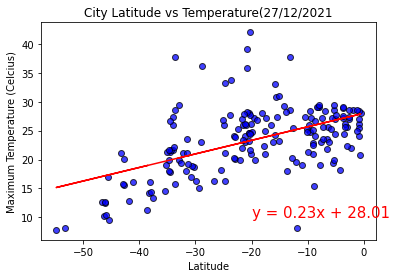

R squared: 0.2777805256855462


In [13]:
x = southern["Lat"]
y = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.title("City Latitude vs Temperature(27/12/2021")

plt.savefig("./Images/South_LatitudeMaxTemp.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

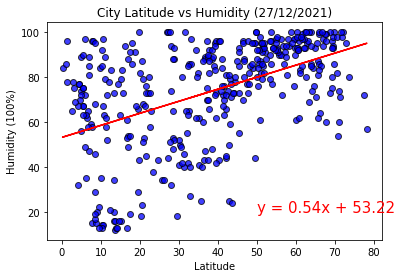

R squared: 0.23160938644542703


In [14]:
x = northern["Lat"]
y = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (100%)")
plt.title("City Latitude vs Humidity (27/12/2021)")

plt.savefig("./Images/North_LatitudeHumidity.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

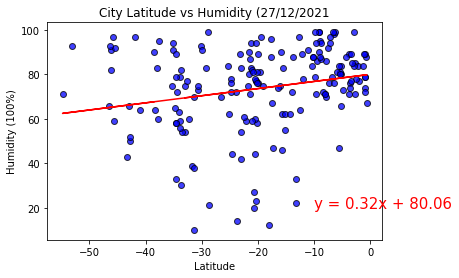

R squared: 0.048555213533040084


In [15]:
x = southern["Lat"]
y = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (100%)")
plt.title("City Latitude vs Humidity (27/12/2021")

plt.savefig("./Images/South_LatitudeHumidity.png")
plt.show()

print(f"R squared: {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

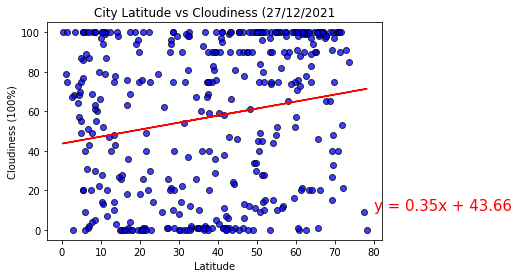

R squared: 0.037184754424485114


In [16]:
x = northern["Lat"]
y = northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (100%)")
plt.title("City Latitude vs Cloudiness (27/12/2021")

plt.savefig("./Images/North_LatitudeCloudiness.png")
plt.show()

print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

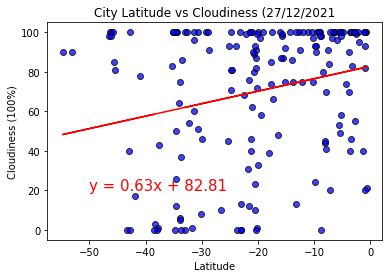

R squared: 0.05806367003934592


In [17]:
x = southern["Lat"]
y = southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (100%)")
plt.title("City Latitude vs Cloudiness (27/12/2021")

plt.savefig("./Images/South_LatitudeCloudiness.png")
plt.show()

print(f"R squared: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

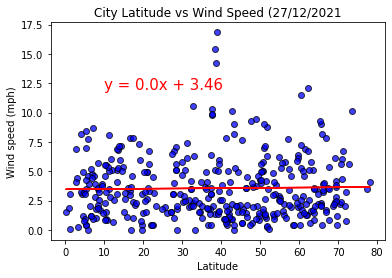

R squared: 0.00039116507822995833


In [18]:
x = northern["Lat"]
y = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (27/12/2021")

plt.savefig("./Images/North_LatitudeWindSpeed.png")
plt.show()

print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

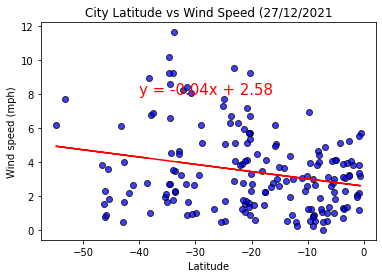

R squared: 0.05868133217585899


In [19]:
x = southern["Lat"]
y = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (27/12/2021")

plt.savefig("./Images/South_LatitudeWindSpeed.png")
plt.show()

print(f"R squared: {rvalue**2}")